In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib import rc 
from matplotlib.animation import FuncAnimation as animate 
rc('animation',html='html5')

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
df = pd.read_csv('spirals.csv')
df = df[:150]
df.head(3)

,x,y,color
0,125.322566,386.764772,1
1,307.117266,337.307489,2
2,246.744149,275.732338,1


In [4]:
df.describe()

,x,y,color
count,150.000000,150.000000,150.000000
mean,301.907546,299.415390,1.006667
std,107.760464,67.148179,0.806822
min,120.627035,130.158449,0.000000
25%,200.128885,268.297527,0.000000
50%,328.156437,300.049660,1.000000
75%,381.253295,354.610496,2.000000
max,491.872504,398.390221,2.000000


In [5]:
class Dataset: 
    def __init__(self,dataset,length=150) -> None:
        dataset.x = (dataset.x - dataset.x.mean())/(dataset.x.max()-dataset.x.min())
        dataset.y = (dataset.y - dataset.y.mean())/(dataset.y.max()-dataset.y.min())
        self.x = dataset[['x','y']][:length].to_numpy() 
        self.y = dataset['color'][:length].to_numpy()
        
    @property
    def shape(self):
        return f"x: ({self.x.shape})\ty: ({self.y.shape})"

    @property
    def plot(self):
        plt.scatter(self.x[:,0],self.x[:,1], c=self.y,cmap=plt.cm.coolwarm)
    

    def __getitem__(self,i):
        return self.x[i],self.y[i] 

    def __len__(self):
        return len(self.x)


In [6]:
class NeuralNet:
    def __init__(self,hidden_nodes=3,num_class=3) -> None:
        self.w1 = np.random.rand(2,hidden_nodes)
        self.b1 = 0
        self.w2 = np.random.rand(hidden_nodes,num_class)
        self.b2 = 0
        self.hidden_scores:int

    def forward(self,X):
        ReLU = lambda x: np.maximum(0,x)
        self.hidden_scores = ReLU(np.dot(self.w1.T,X)+self.b1)
        # (3,1)
        scores = np.dot(self.w2.T,self.hidden_scores)+self.b2
        return self.softmax(scores)

    def softmax(self,x):
        expS = np.exp(x) # [[exp(s1) exp(s2) exp(s3)]]
        sum_expS = np.sum(expS,axis=1,keepdims=True) # exp(s1) + exp(s2) + exp(s3)
        return expS/sum_expS
         

    

In [7]:
data = Dataset(df)

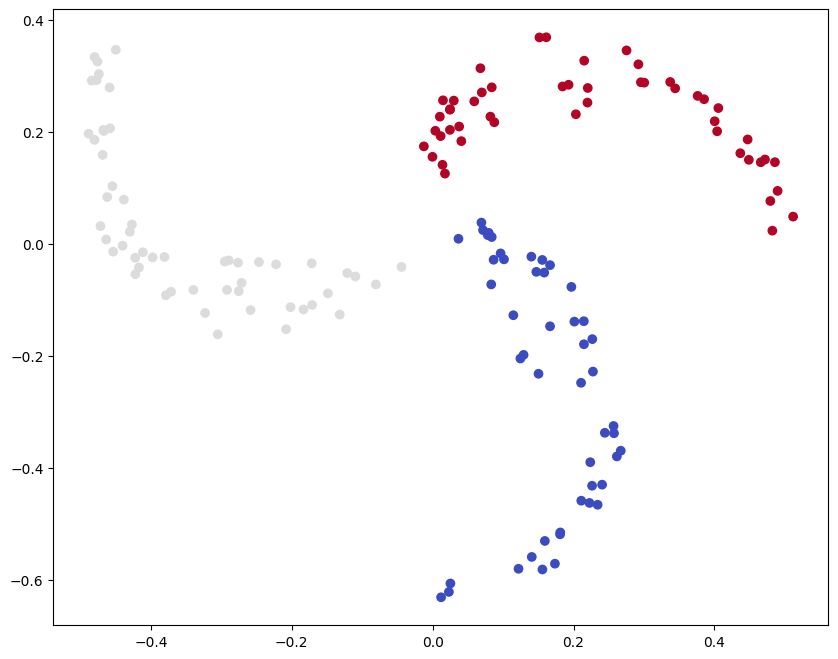

In [8]:
data.plot

(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 22500)
(22500,) (150, 150)
(3, 2250

(3, 22500)
(22500,) (150, 150)


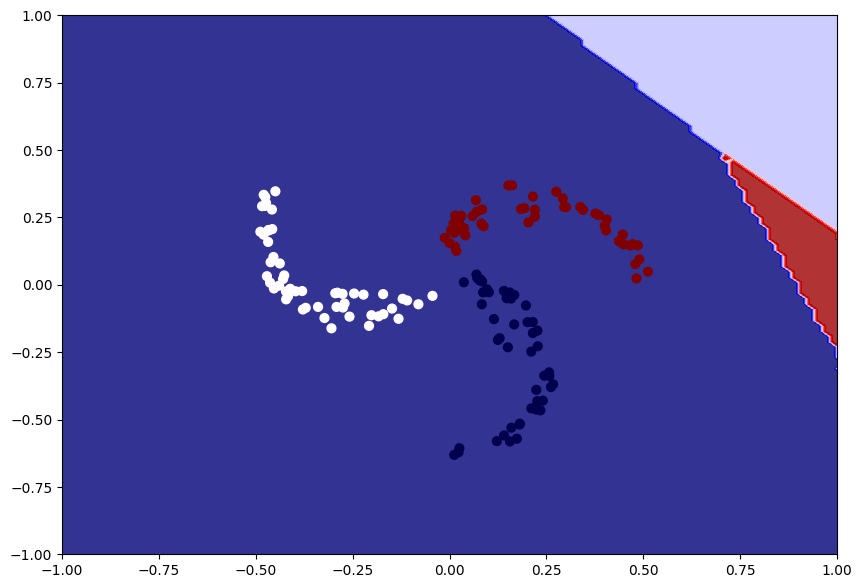

In [21]:

np.random.seed(0)
data = Dataset(df)

h = 0.02
x_min, x_max = data.x[:, 0].min() - 1, data.x[:, 0].max() + 1
y_min, y_max = data.x[:, 1].min() - 1, data.x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


fig , ax = plt.subplots(figsize = (10,7))

model = NeuralNet()

def train(_):
    global w,b
    for x,y in data:
        x=x.reshape((2,1))
        p = model.forward(x)
        p[y]-=1
        # break
        model.dw2 = np.dot(model.hidden_scores,p.T)
        model.w2-= 0.001*model.dw2
        db2 = np.sum(p,axis=0,keepdims=True)
        model.b2-=0.001*db2
        
        dhidden = np.dot(model.w2.T,p)
        dhidden[model.hidden_scores<=0]=0 
        dw = np.dot(x,dhidden.T)
        db = np.sum(dhidden,axis=0,keepdims=True)

        model.b1 -= 0.001*db 
        model.w1 -= 0.001*dw 


    Z = model.forward(np.c_[xx.ravel(), yy.ravel()].T)
    Z = np.argmax(Z, axis=0)
    Z = Z.reshape(xx.shape)
    ax.clear()
    ax.contourf(xx, yy, Z, cmap=plt.cm.seismic, alpha=0.8)
    ax.scatter(data.x[:, 0], data.x[:, 1], c=data.y, s=40, cmap=plt.cm.seismic)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    
plots = animate(fig,train,frames=300,interval = 100,repeat=False)
plots
# train('')